<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 176 (delta 14), reused 13 (delta 6), pack-reused 144 (from 1)
Receiving objects: 100% (176/176), 650.42 KiB | 4.78 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [3]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git add nnn.py visualiser.py __init__.py
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   nnn.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/



In [ ]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [ ]:
!git commit -m "add non-linearity to Neuron"

[main 683a27d] add non-linearity to Neuron
 1 file changed, 8 insertions(+), 5 deletions(-)


In [ ]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 439 bytes | 439.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   9eaf6c5..683a27d  main -> main


# Housekeeping

In [ ]:
!pwd

/content/NaiveNeuralNetwork


In [4]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [5]:
from nnn import *
from visualiser import *


# Visualise

In [ ]:
a=Scalar(2., label='a')
b=Scalar(-3, label='b')
c=Scalar(10, label='c')
e=a*b; e.label='e'
d=e+c+b; d.label='d'
f=d/e; f.label='f'
L=(-f).relu(); L.label='L'


In [ ]:
L.backward()

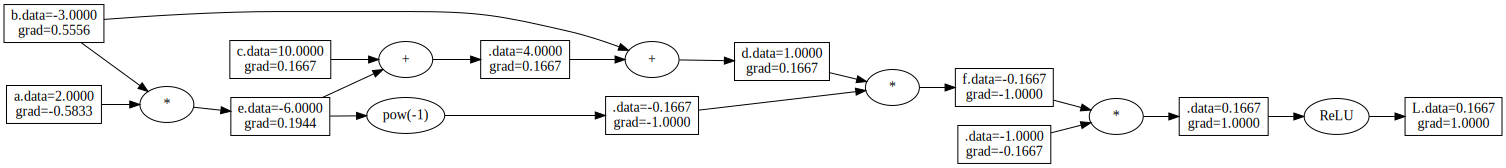

In [ ]:
visualise(L)

# Gradient

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

In [ ]:
def f(x):
  return 3*x**2 - 4 * x + 5

In [ ]:
f(2.0)

9.0

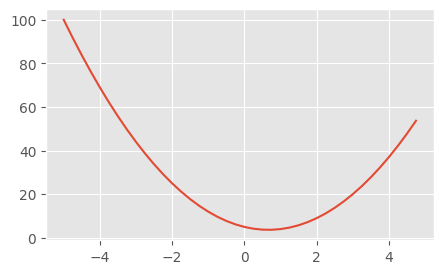

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

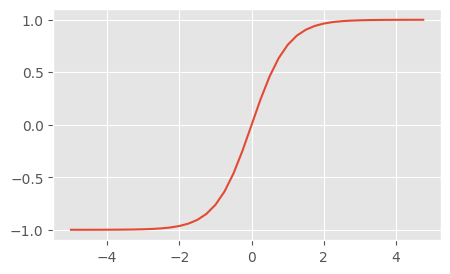

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)
plt.plot(xs, ys)

The definition of [derivitive](https://en.wikipedia.org/wiki/Derivative) as a limit is that
$$L=\lim_{h \to 0} \dfrac{f_{(a+h)} - f_{(h)}} {h}$$

In [ ]:
h=1e-7
a=2.0
(f(a+h)-f(a))/h

8.000000288888032

Numerically check against the Scalar backward() results.

In [ ]:
def lol():
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L1=f.data


  h=1e-4
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')+h
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L2=f.data

  print((L2-L1)/h)

lol()

-15.999400000037411


# Test with MLP

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double().requires_grad_(True)
x2 = torch.Tensor([0.0]).double().requires_grad_(True)
w1 = torch.Tensor([-3.0]).double().requires_grad_(True)
w2 = torch.Tensor([1.0]).double().requires_grad_(True)
b = torch.Tensor([6.8813735870195432]).double().requires_grad_(True)
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
from nnn import *

In [ ]:
X = [0.3, -2.7, 2.5]
mlp = MLP(3, [2,1])
mlp(X)


o(L1,0): 0.18417589247859845

In [ ]:
mlp.layers[1].neurons[0]

Neuron(1, 0) is linear

In [ ]:
mlp.parameters()

[w(L0,0,I0): 0.9388544559873178,
 w(L0,0,I1): -0.3832593892852567,
 w(L0,0,I2): -0.8948179259791473,
 b(L0,0): -0.47161648832074676,
 w(L0,1,I0): 0.13330757713905084,
 w(L0,1,I1): 0.03588149521178585,
 w(L0,1,I2): 0.7802948818400459,
 b(L0,1): -0.4623917570351568,
 w(L1,0,I0): -0.4587288171991324,
 w(L1,0,I1): 0.6877286342061599,
 b(L1,0): 0.24003169386991052]

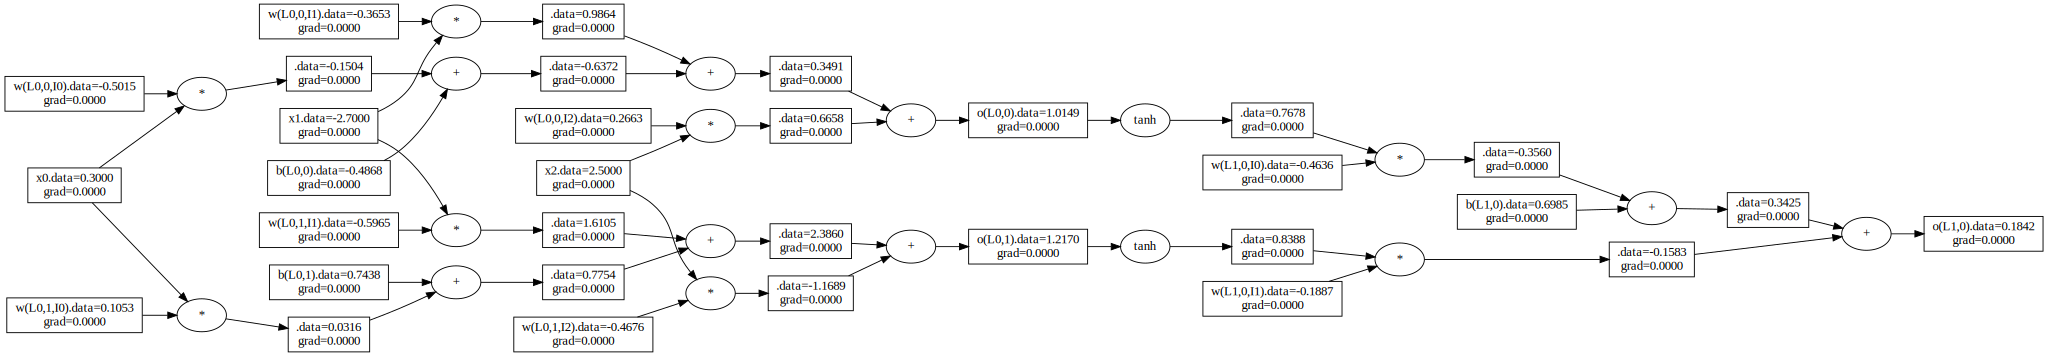

In [ ]:
visualise(mlp(X))

In [ ]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])
y_pred = [mlp(x) for x in batch_x]
y_pred

[o(L2,0): -0.7323917619946334 ; grad: 0.0,
 o(L2,0): -0.32306326875896907 ; grad: 0.0,
 o(L2,0): -0.7862529062925345 ; grad: 0.0,
 o(L2,0): -0.3946943837124156 ; grad: 0.0]

Iterating the cells below to see the loss decrease and the y_pred get closer and closer to the ground truth batch_y.

In [ ]:
loss = [(y_pred[i]-batch_y[i])**2 for i in range(len(batch_y))];
loss

[: 0.12161587439491345 ; grad: 0.0,
 : 1.1423912856873548 ; grad: 0.0,
 : 1.3172961093572702 ; grad: 0.0,
 : 0.0097737819608882 ; grad: 0.0]

In [ ]:
loss = sum(loss); loss.label='loss'
loss

loss: 2.5910770514004264 ; grad: 0.0

In [ ]:
mlp.zero_grad()
loss.backward()

In [ ]:
for p in mlp.parameters():
  p.data += -0.05 * p.grad

In [ ]:
y_pred = [mlp(x) for x in batch_x]
y_pred

[o(L2,0): 0.03908006610826469 ; grad: 0.0,
 o(L2,0): -0.8484371977870181 ; grad: 0.0,
 o(L2,0): -0.6342138510773754 ; grad: 0.0,
 o(L2,0): 0.49163241114650474 ; grad: 0.0]

In [ ]:
mlp.parameters()

[w(L0,0,I0): 0.007355569306717158 ; grad: 3.103244932498236,
 w(L0,0,I1): 0.2853626579227034 ; grad: 0.06246281291304376,
 w(L0,0,I2): -0.6441256333543184 ; grad: 1.4568170768626112,
 b(L0,0): 0.5293415095797328 ; grad: 1.8515897623969921,
 w(L0,1,I0): 0.08011369974505857 ; grad: -1.952052927602851,
 w(L0,1,I1): -0.4172455740416888 ; grad: -0.015873930437945126,
 w(L0,1,I2): 0.5205456191274951 ; grad: -0.9172031341532425,
 b(L0,1): -0.5712172912105214 ; grad: -1.1532518413397814,
 w(L0,2,I0): -0.5020123001220793 ; grad: -0.02572152830664452,
 w(L0,2,I1): 0.23876068605501533 ; grad: 0.005824153265566866,
 w(L0,2,I2): -0.532993784233391 ; grad: 0.0808199035342881,
 b(L0,2): 0.2479630764517145 ; grad: 0.021311797286053348,
 w(L0,3,I0): -0.5382940319324979 ; grad: 0.5973775808092241,
 w(L0,3,I1): -0.5924539305956242 ; grad: -0.10737864126584387,
 w(L0,3,I2): -0.7853134742362239 ; grad: 0.40674011360433004,
 b(L0,3): 0.4518807848707058 ; grad: 0.39176280185658374,
 w(L1,0,I0): -0.3621337111

Interesting thing about the following graph: since tanh() is used as activation, and the y values are -1 or 1, the gradients of tanh() are all zeros.

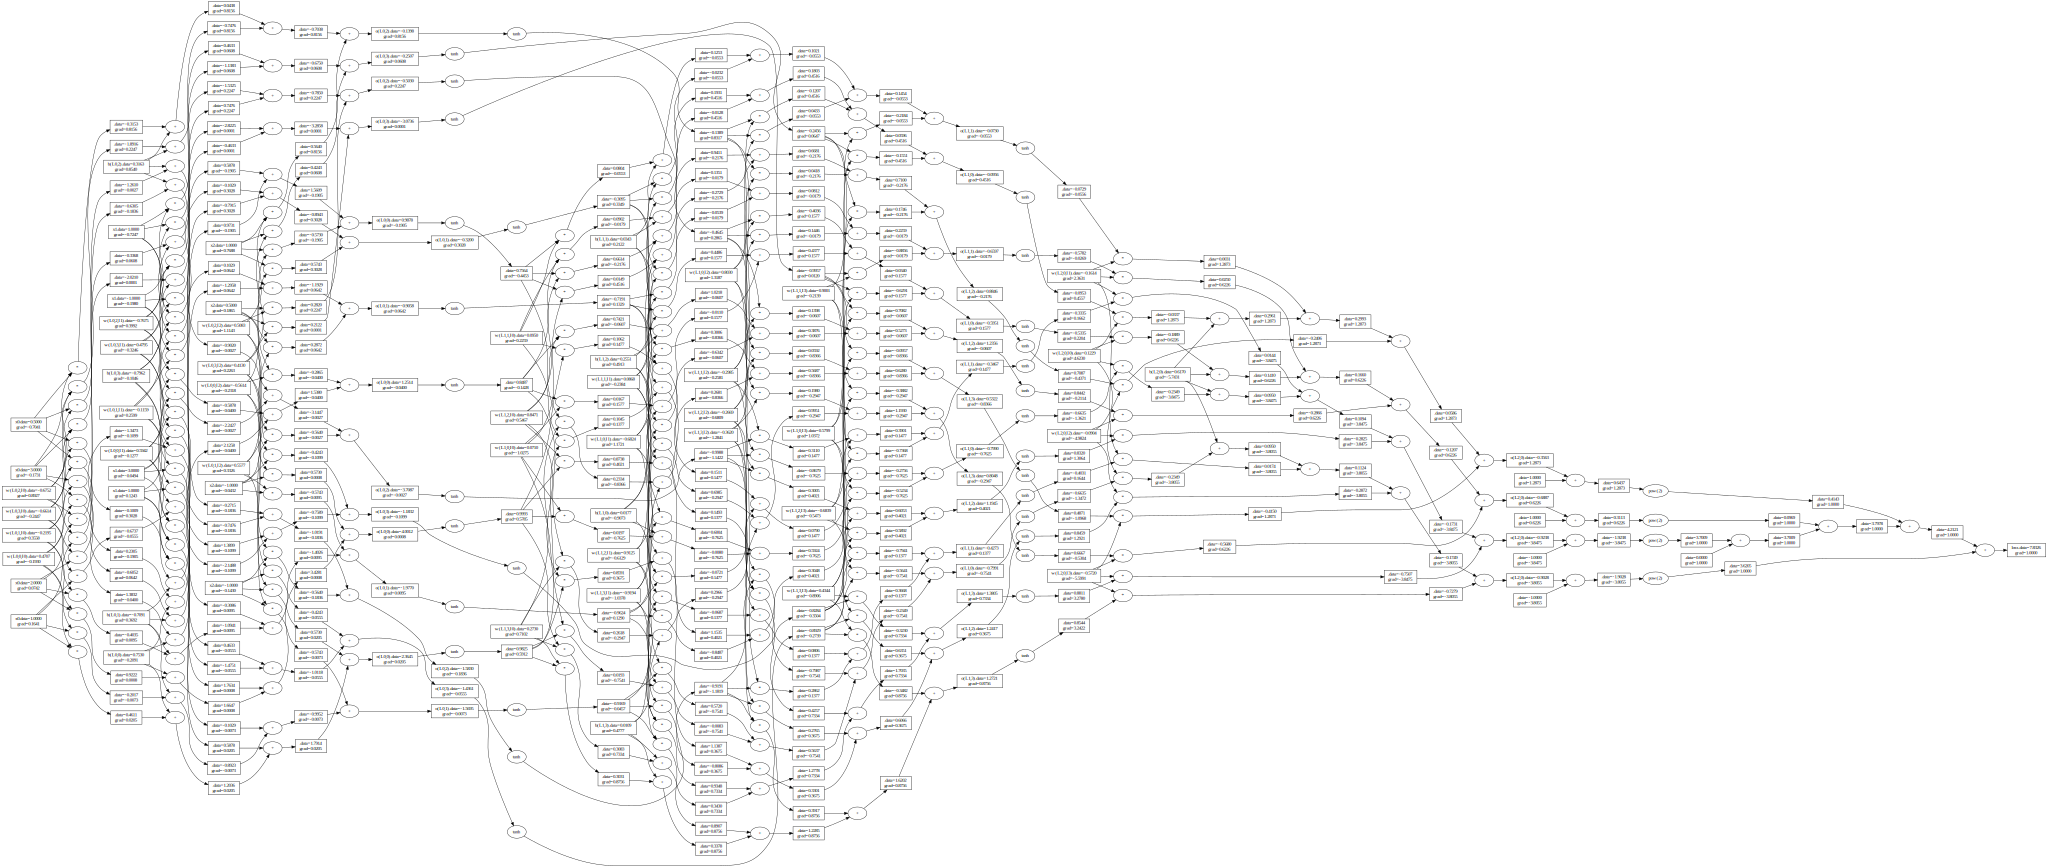

In [ ]:
visualise(loss)

Putting the above together in a loop

In [71]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])

In [72]:
ys_b4=[w.data for n in mlp.layers[1].neurons for w in n.w]
y0s_b4=[w.data for n in mlp.layers[0].neurons for w in n.w]
y2s_b4=[w.data for n in mlp.layers[2].neurons for w in n.w]

In [73]:
losses=[]
batch_size=300
for i in range(batch_size):
  # forward pass
  y_pred = [mlp(x) for x in batch_x]
  loss = sum([(y_pred[i]-batch_y[i])**2 for i in range(len(batch_x))])

  losses.append(loss)

  # backward pass
  mlp.zero_grad()
  loss.backward()

  # update parameters
  for p in mlp.parameters():
    p.data += -0.01 * p.grad

  if i%50 == 0:
    print(f"{i}: loss={loss.data}")

0: loss=12.877368290122822
50: loss=0.09486382073665375
100: loss=0.0024934728265023592
150: loss=6.451898400243411e-05
200: loss=1.6495159384907637e-06
250: loss=4.2661912505764213e-08


In [74]:
y_pred

[o(L2,0): 0.9999759815395229,
 o(L2,0): -0.9999998541500235,
 o(L2,0): -0.9999955603671408,
 o(L2,0): 0.9999759815395229]

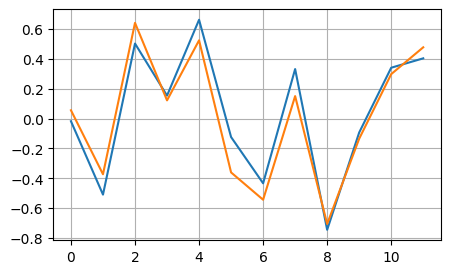

In [75]:
ys=[w.data for n in mlp.layers[1].neurons for w in n.w]
y0s=[w.data for n in mlp.layers[0].neurons for w in n.w]
y2s=[w.data for n in mlp.layers[2].neurons for w in n.w]
xs=[i for i in range(len(y0s))]
plt.plot(xs, y0s_b4, y0s)
#print(len(xs), len(ys), len(y0s), len(y2s))

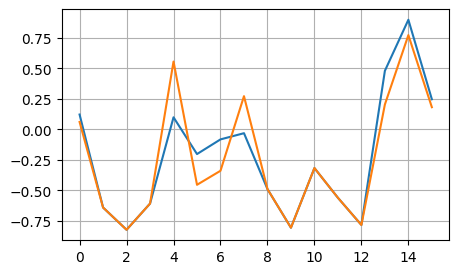

In [76]:
plt.plot([i for i in range(len(ys))], ys_b4, ys)

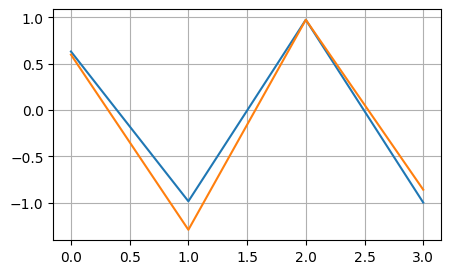

In [77]:
plt.plot([i for i in range(len(y2s))], y2s_b4, y2s)

In [68]:
mlp.parameters()

[w(L0,0,I0): 0.4633673380516698,
 w(L0,0,I1): 0.7130085167271734,
 w(L0,0,I2): -0.2660647724255997,
 b(L0,0): 0.9209066788075913,
 w(L0,1,I0): 0.7727340597738508,
 w(L0,1,I1): 0.8001717352002075,
 w(L0,1,I2): -0.613107857166871,
 b(L0,1): 0.9085515919411868,
 w(L0,2,I0): -0.10788048401933037,
 w(L0,2,I1): -0.6672535976916393,
 w(L0,2,I2): -0.1389475578421082,
 b(L0,2): -0.6101329275550442,
 w(L0,3,I0): -0.07138095392561661,
 w(L0,3,I1): -0.0301546941138573,
 w(L0,3,I2): -1.0807607700346806,
 b(L0,3): -0.02810433024882471,
 w(L1,0,I0): -0.43846223357185976,
 w(L1,0,I1): 0.3486784540380619,
 w(L1,0,I2): -0.7310740946094588,
 w(L1,0,I3): 1.2833780299918345,
 b(L1,0): -0.08496555768658416,
 w(L1,1,I0): -0.46441745250388344,
 w(L1,1,I1): -0.12282015143132513,
 w(L1,1,I2): -0.2966399011474592,
 w(L1,1,I3): 0.019653300427847162,
 b(L1,1): -0.2618014393754545,
 w(L1,2,I0): -0.49036364393272336,
 w(L1,2,I1): -0.0003482037382152415,
 w(L1,2,I2): -0.4696333611792643,
 w(L1,2,I3): -0.4932173203974

this graph is using relu() for non-linear

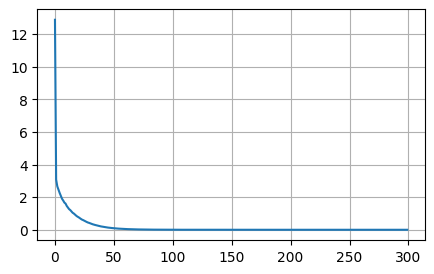

In [78]:
xs=[i for i in range(batch_size)]
plt.plot(xs, [l.data for l in losses])
#plt.yscale('log')
#plt.xscale('log')

This graph is using tanh() for non-linear

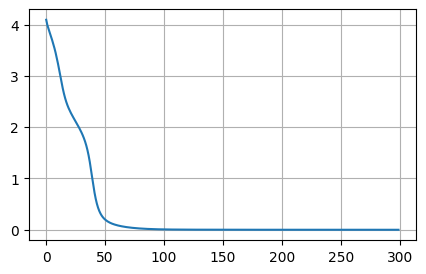

In [70]:
xs=[i for i in range(batch_size)]
plt.plot(xs, [l.data for l in losses])
#plt.yscale('log')
#plt.xscale('log')